#>Data Analysis to improve customer experince by analysing sales data
#>Increase revenue by focusing on customers beaviour and priority on purchasing



##importing libraries and dataset

In [208]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [209]:
df=pd.read_csv(r'/content/Diwali Sales Data (1).csv',encoding='unicode escape')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [210]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN


In [211]:
df.shape

(11251, 15)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [213]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [214]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [215]:
df['Amount'].fillna(df['Amount'].mean(),inplace=True)

In [216]:
df['Amount']=df['Amount'].astype('int')

In [217]:
df['Gender'].value_counts()

F    7842
M    3409
Name: Gender, dtype: int64

##customer count on gender and marital status basis

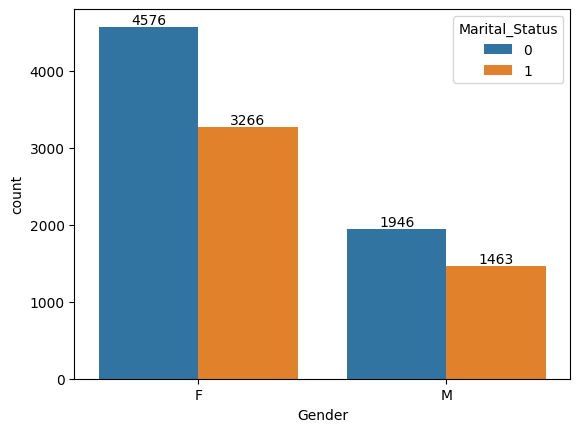

In [218]:
x=sns.countplot(x='Gender',data=df,hue='Marital_Status')
for bars in x.containers:
  x.bar_label(bars)

##conclusion: More number of females are shopping as compare to males

##purcasing power on gender and marital status basis

In [219]:
MGA=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by="Amount",ascending=False)
MGA

,Marital_Status,Gender,Amount
0,0,F,43815005
2,1,F,30615378
1,0,M,18348191
3,1,M,13583991


<Axes: xlabel='Marital_Status', ylabel='Amount'>

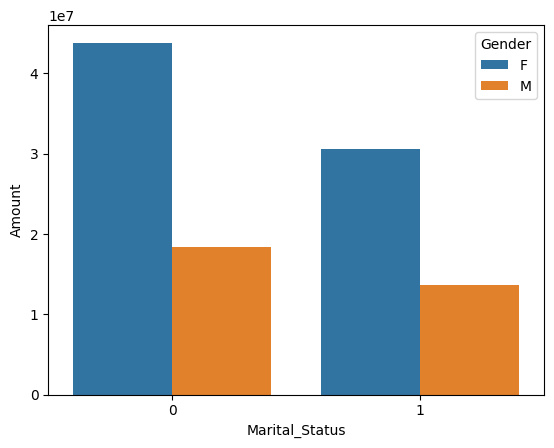

In [220]:
sns.barplot(x='Marital_Status',y='Amount',data=MGA,hue='Gender')

##conclusion: More number of females are shopping as compare to males

##count of customer on age group and gender basis

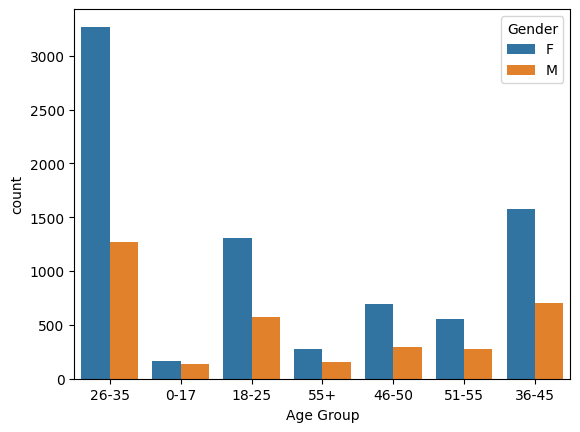

In [221]:
x1=sns.countplot(x='Age Group',data=df,hue='Gender')
for bars in x1.containers:
  x.bar_label(bars)

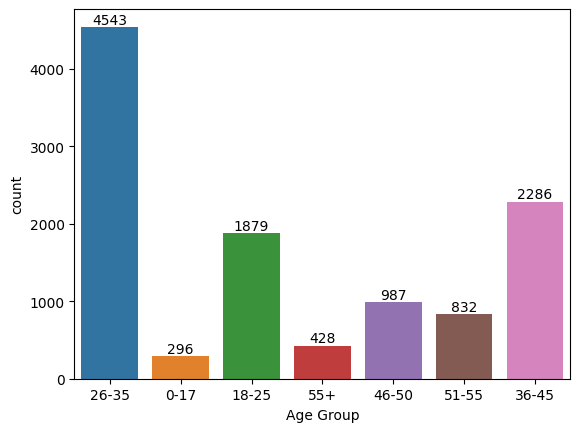

In [222]:
x2=sns.countplot(x='Age Group',data=df)
for bars in x2.containers:
  x2.bar_label(bars)

##conclusion: number of customers are more of age between 26 to 35 year

##amount spend by customer on age group basis

In [223]:
age_amount=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
age_amount

,Age Group,Amount
2,26-35,42632348
3,36-45,22173353
1,18-25,17240732
4,46-50,9245656
5,51-55,8280383
6,55+,4090440
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

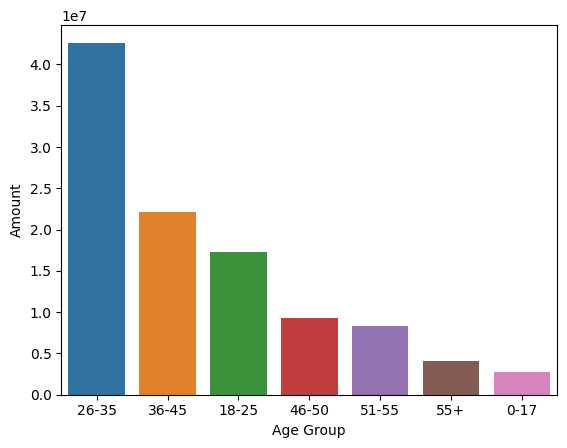

In [224]:
sns.barplot(x='Age Group',y='Amount',data=age_amount)




##conclusion:amount spend by customers are more of age between 26 to 35 year

##amount spend by statewise

In [225]:
state_amt=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
state_amt

,State,Amount
14,Uttar Pradesh,19393874
10,Maharashtra,14436996
7,Karnataka,13532993
2,Delhi,11632177
9,Madhya Pradesh,8120048
0,Andhra Pradesh,8046599
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3964988


<Axes: xlabel='State', ylabel='Amount'>

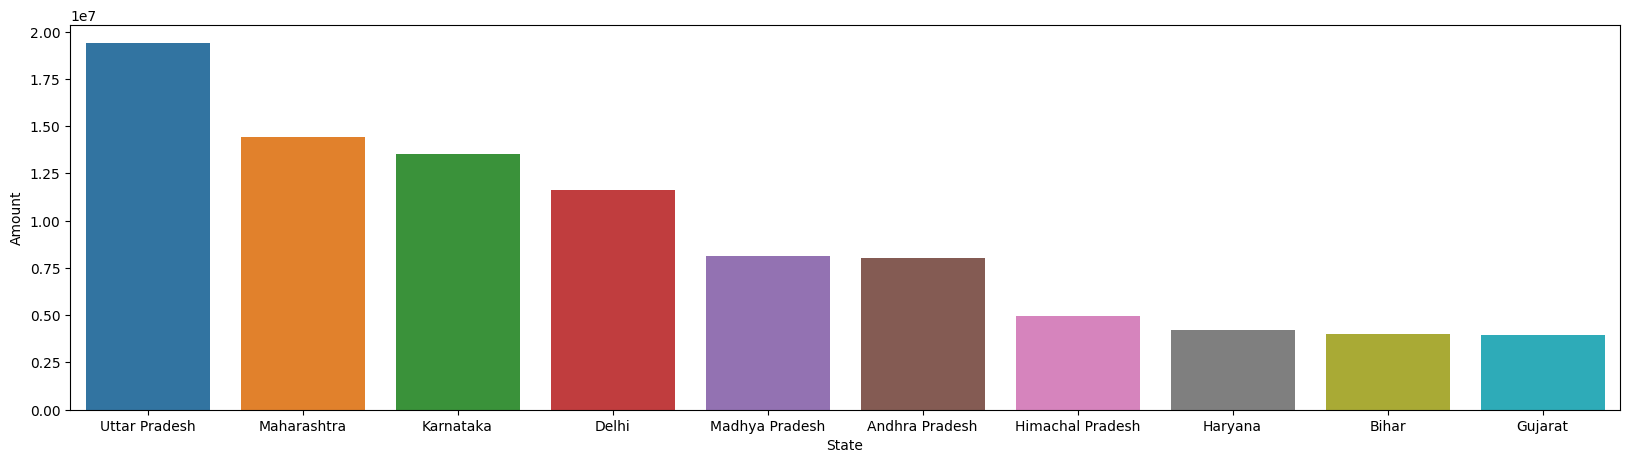

In [226]:
plt.figure(figsize=(20,5))
sns.barplot(x='State',y='Amount',data=state_amt)

##conclusion: top 3 states in amount spending are Uttar pradesh,Maharashtra and Karnataka

##number of customers statewise

In [227]:
state_ord=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
state_ord

,State,Orders
14,Uttar Pradesh,4813
10,Maharashtra,3811
7,Karnataka,3241
2,Delhi,2744
9,Madhya Pradesh,2259
0,Andhra Pradesh,2054
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1070


<Axes: xlabel='State', ylabel='Orders'>

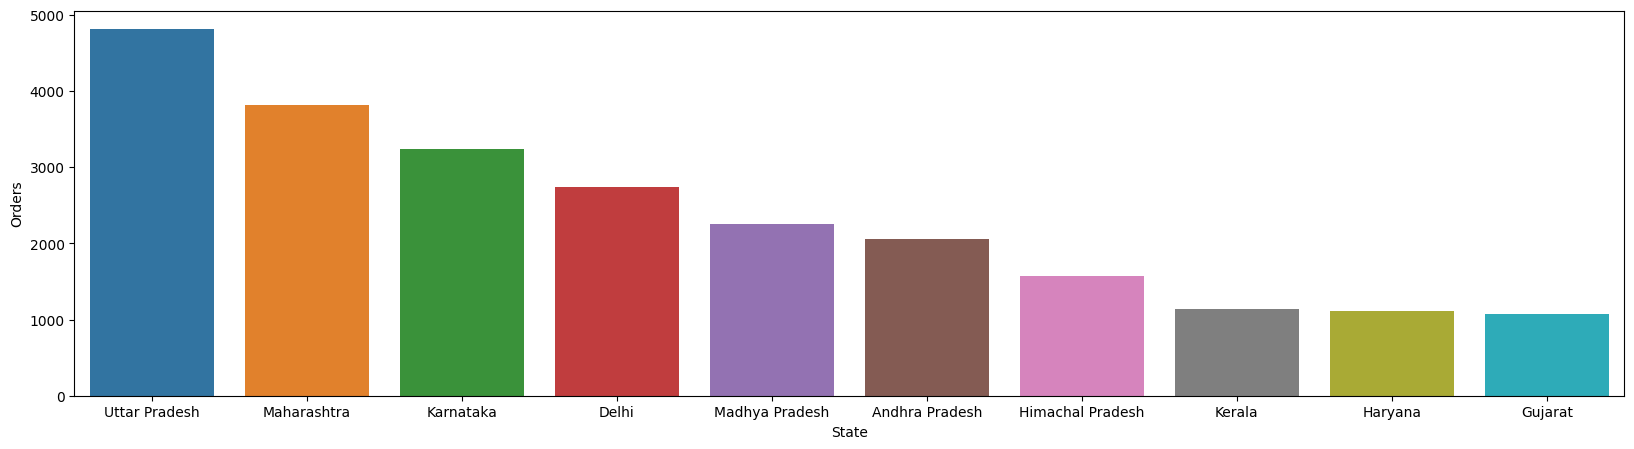

In [228]:
plt.figure(figsize=(20,5))
sns.barplot(x='State',y='Orders',data=state_ord)

##conclusion: top 3 customer counts are from Uttar pradesh, Maharashtra and Karnataka

##occupationwise purchasing power

In [229]:
oc_amt=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
oc_amt

,Occupation,Amount
10,IT Sector,14802344
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10789516
7,Govt,8517212
9,Hospitality,6395311
12,Media,6295832
1,Automobile,5378049
4,Chemical,5306889
11,Lawyer,4981665


<Axes: xlabel='Occupation', ylabel='Amount'>

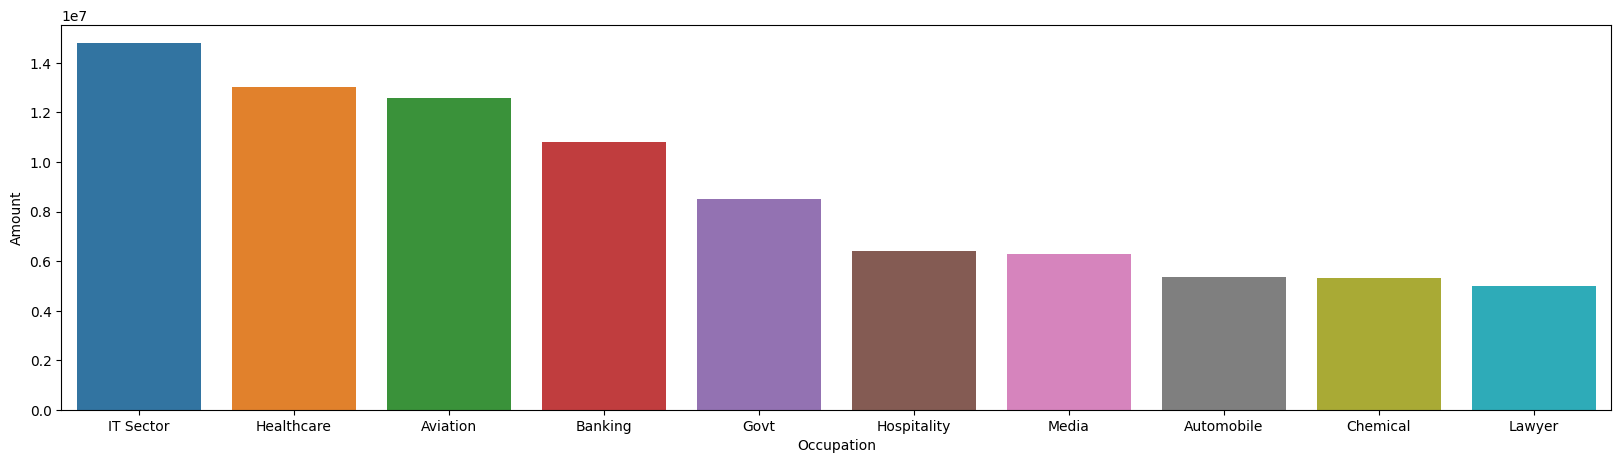

In [230]:
plt.figure(figsize=(20,5))
sns.barplot(x='Occupation',y='Amount',data=oc_amt)

## conclusion: maximum purchasing done by customers from IT sector,Healthcare and aviation.

## productwise spending

In [231]:
pr_amt=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
pr_amt

,Product_Category,Amount
6,Food,33962242
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15622474
8,Furniture,5449504
9,Games & Toys,4331694
14,Sports Products,3635933
0,Auto,1986968
1,Beauty,1959484
15,Stationery,1676051


<Axes: xlabel='Product_Category', ylabel='Amount'>

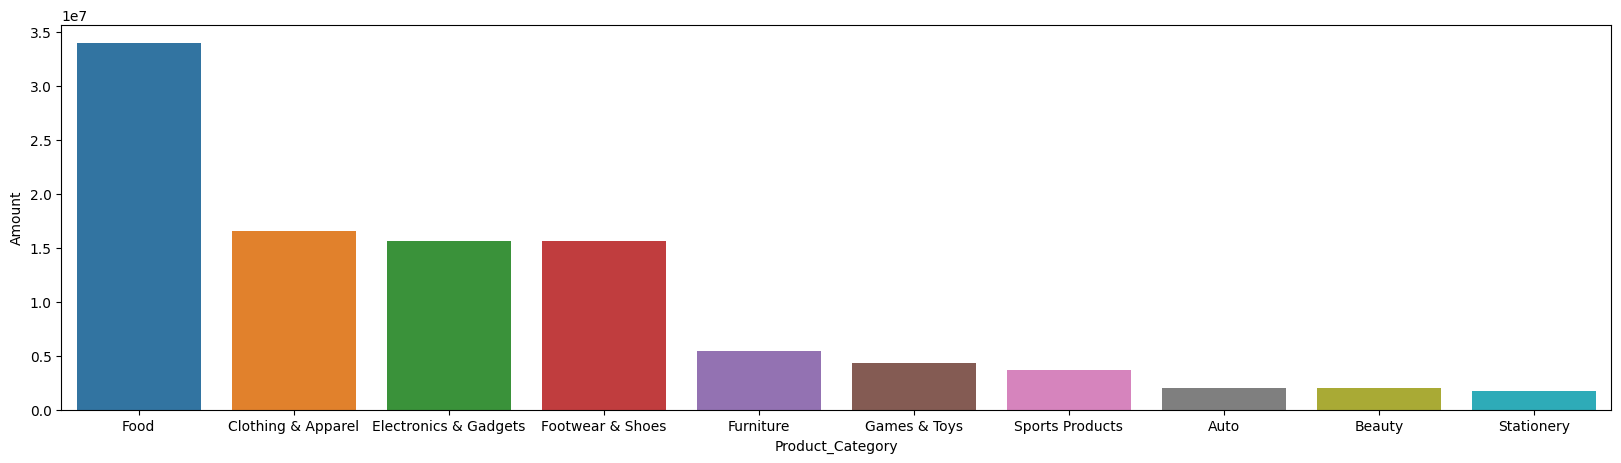

In [232]:
plt.figure(figsize=(20,5))
sns.barplot(x='Product_Category',y='Amount',data=pr_amt)

##conclusion: maximum amount spends on food,clothing & apparels,electronics & gadgets

##customer count on productwise spending

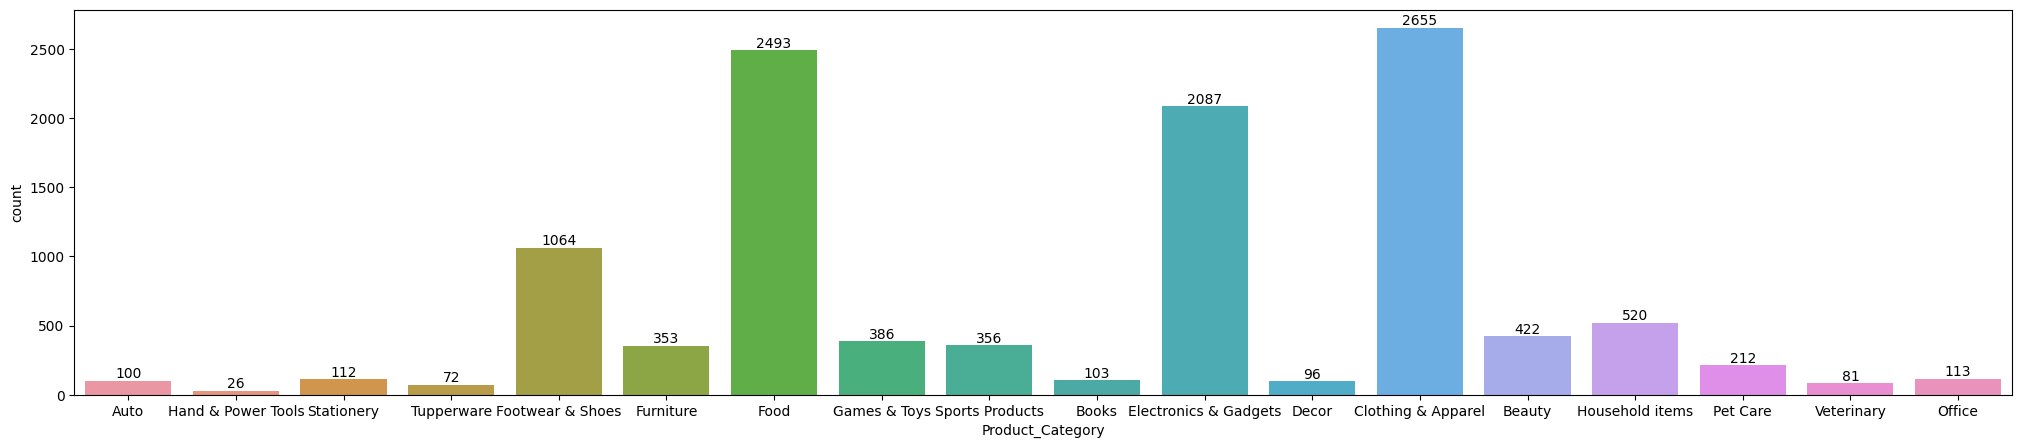

In [233]:
plt.figure(figsize=(25,5))
x5=sns.countplot(x='Product_Category',data=df)
for bars in x5.containers:
  x5.bar_label(bars)


##conclusion: top 3 product purchase on number basis are clothings & apparels,food,electronics & gadgets

##spefific product in demand

In [234]:
pr_ord=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
pr_ord

,Product_ID,Orders
1680,P00265242,127
645,P00110942,116
1505,P00237542,91
1147,P00184942,82
680,P00114942,79
172,P00025442,79
889,P00145042,76
709,P00117942,76
299,P00044442,75
644,P00110842,74


<Axes: xlabel='Product_ID', ylabel='Orders'>

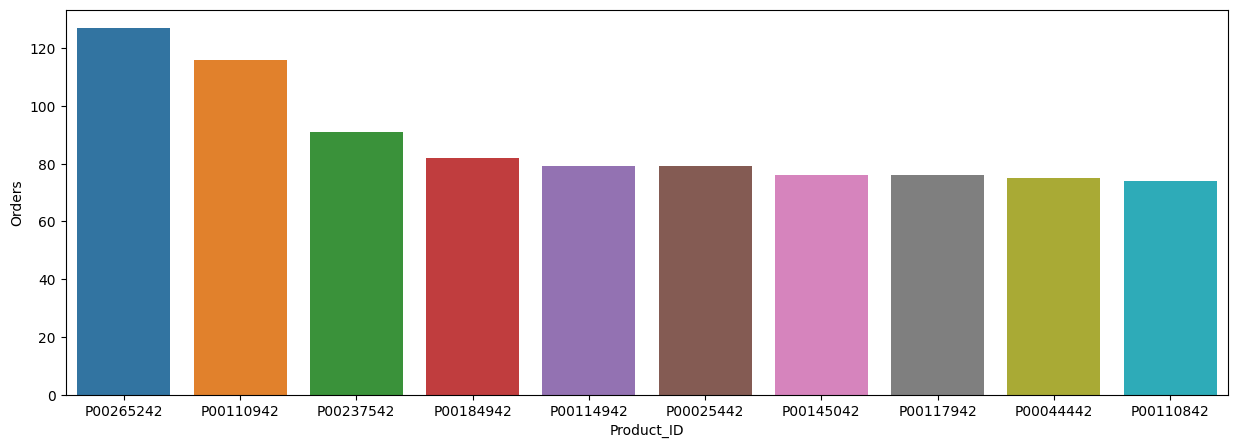

In [235]:
plt.figure(figsize=(15,5))
sns.barplot(x='Product_ID',y='Orders',data=pr_ord)

##conclusion: product with id no P00265242, P00110942,P00237542 are top in demand

#FINAL CONCLUSION: married women age group from 26 to 35 from UP,Maharashtra and Karnataka working in IT,Healthcare and Aviation are more likely to buy product from Food,clothings and electronics category